In [1]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150, 150, 3))

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
import os

base_dir = '../datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30, 
                    validation_data=validation_generator, 
                    validation_steps=50, 
                    verbose=2)

Epoch 1/30
100/100 - 81s - loss: 0.6183 - acc: 0.6490 - val_loss: 0.4853 - val_acc: 0.8240
Epoch 2/30
100/100 - 81s - loss: 0.5040 - acc: 0.7740 - val_loss: 0.3920 - val_acc: 0.8530
Epoch 3/30
100/100 - 81s - loss: 0.4437 - acc: 0.8045 - val_loss: 0.3463 - val_acc: 0.8660
Epoch 4/30
100/100 - 80s - loss: 0.4061 - acc: 0.8230 - val_loss: 0.3224 - val_acc: 0.8730
Epoch 5/30
100/100 - 80s - loss: 0.3819 - acc: 0.8330 - val_loss: 0.2970 - val_acc: 0.8780
Epoch 6/30
100/100 - 81s - loss: 0.3760 - acc: 0.8370 - val_loss: 0.2859 - val_acc: 0.8850
Epoch 7/30
100/100 - 81s - loss: 0.3656 - acc: 0.8395 - val_loss: 0.3006 - val_acc: 0.8740
Epoch 8/30
100/100 - 81s - loss: 0.3572 - acc: 0.8460 - val_loss: 0.2747 - val_acc: 0.8880
Epoch 9/30
100/100 - 81s - loss: 0.3480 - acc: 0.8425 - val_loss: 0.2677 - val_acc: 0.8930
Epoch 10/30
100/100 - 81s - loss: 0.3400 - acc: 0.8445 - val_loss: 0.2686 - val_acc: 0.8910
Epoch 11/30
100/100 - 81s - loss: 0.3362 - acc: 0.8565 - val_loss: 0.2583 - val_acc: 0.90

In [7]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [8]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-5), 
              metrics=['acc'])

history = model.fit(train_generator, 
                    steps_per_epoch=100, 
                    epochs=100, 
                    validation_data=validation_generator, 
                    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 99s 987ms/step - loss: 0.3013 - acc: 0.8735 - val_loss: 0.2264 - val_acc: 0.9030
Epoch 2/100
100/100 [==============================] - 98s 984ms/step - loss: 0.2681 - acc: 0.8840 - val_loss: 0.2336 - val_acc: 0.9060
Epoch 3/100
100/100 [==============================] - 98s 985ms/step - loss: 0.2492 - acc: 0.8960 - val_loss: 0.1997 - val_acc: 0.9180
Epoch 4/100
100/100 [==============================] - 99s 988ms/step - loss: 0.2227 - acc: 0.9110 - val_loss: 0.2013 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 98s 985ms/step - loss: 0.2052 - acc: 0.9170 - val_loss: 0.1959 - val_acc: 0.9240
Epoch 6/100
100/100 [==============================] - 99s 987ms/step - loss: 0.1996 - acc: 0.9195 - val_loss: 0.2007 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 99s 989ms/step - loss: 0.1828 - acc: 0.9260 - val_loss: 0.1994 - val_acc: 0.9300
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 99s 987ms/step - loss: 0.0382 - acc: 0.9870 - val_loss: 0.3095 - val_acc: 0.9340
Epoch 62/100
100/100 [==============================] - 99s 989ms/step - loss: 0.0250 - acc: 0.9885 - val_loss: 0.2526 - val_acc: 0.9390
Epoch 63/100
100/100 [==============================] - 99s 989ms/step - loss: 0.0325 - acc: 0.9900 - val_loss: 0.2355 - val_acc: 0.9390
Epoch 64/100
100/100 [==============================] - 98s 985ms/step - loss: 0.0324 - acc: 0.9885 - val_loss: 0.4322 - val_acc: 0.9130
Epoch 65/100
100/100 [==============================] - 99s 987ms/step - loss: 0.0307 - acc: 0.9880 - val_loss: 0.2161 - val_acc: 0.9420
Epoch 66/100
100/100 [==============================] - 99s 988ms/step - loss: 0.0236 - acc: 0.9930 - val_loss: 0.3341 - val_acc: 0.9340
Epoch 67/100
100/100 [==============================] - 99s 986ms/step - loss: 0.0330 - acc: 0.9885 - val_loss: 0.2591 - val_acc: 0.9390
Epoch 68/100
100/100 [===================

In [9]:
model.save('cats_and_dogs_small_4.h5')

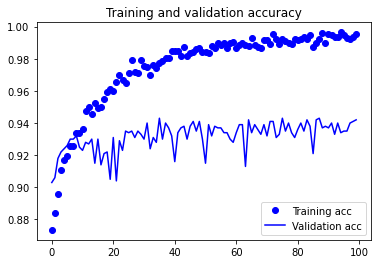

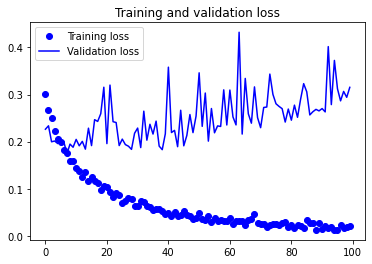

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

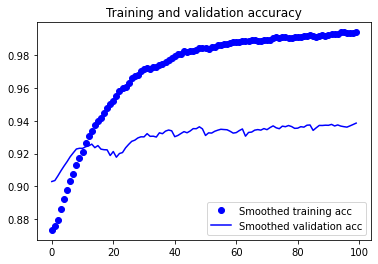

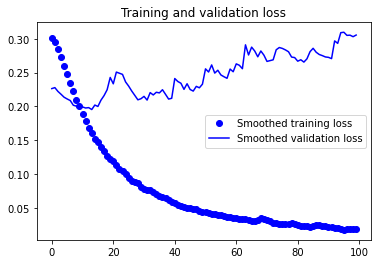

In [12]:
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 26s 526ms/step - loss: 0.3689 - acc: 0.9350
test acc: 0.9350000023841858
